In [2]:
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [3]:
df_loan = pd.read_csv(r'C:\Users\batman\Desktop\Micro-Credit-Project\Micro Credit Project\Data file.csv')
df_loan

Unnamed: 0  label       msisdn     aon  daily_decr30  daily_decr90  \
0                1      0  21408I70789   272.0   3055.050000   3065.150000   
1                2      1  76462I70374   712.0  12122.000000  12124.750000   
2                3      1  17943I70372   535.0   1398.000000   1398.000000   
3                4      1  55773I70781   241.0     21.228000     21.228000   
4                5      1  03813I82730   947.0    150.619333    150.619333   
...            ...    ...          ...     ...           ...           ...   
209588      209589      1  22758I85348   404.0    151.872333    151.872333   
209589      209590      1  95583I84455  1075.0     36.936000     36.936000   
209590      209591      1  28556I85350  1013.0  11843.111667  11904.350000   
209591      209592      1  59712I82733  1732.0  12488.228333  12574.370000   
209592      209593      1  65061I85339  1581.0   4489.362000   4534.820000   

        rental30  rental90  last_rech_date_ma  last_rech_date_da  ...  \
0         220.13    260.13                2.0                0.0  ...   
1        3691.26   3691.26               20.0                0.0  ...   
2         900.13    900.13                3.0                0.0  ...   
3         159.42    159.42               41.0                0.0  ...   
4        1098.90   1098.90                4.0                0.0  ...   
...          ...       ...                ...                ...  ...   
209588   1089.19   1089.19                1.0                0.0  ...   
209589   1728.36   1728.36                4.0                0.0  ...   
209590   5861.83   8893.20                3.0                0.0  ...   
209591    411.83    984.58                2.0               38.0  ...   
209592    483.92    631.20               13.0                0.0  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 37 columns]

In [4]:
df_mci = df_loan.iloc[:,1:]
df_mci

label       msisdn     aon  daily_decr30  daily_decr90  rental30  \
0           0  21408I70789   272.0   3055.050000   3065.150000    220.13   
1           1  76462I70374   712.0  12122.000000  12124.750000   3691.26   
2           1  17943I70372   535.0   1398.000000   1398.000000    900.13   
3           1  55773I70781   241.0     21.228000     21.228000    159.42   
4           1  03813I82730   947.0    150.619333    150.619333   1098.90   
...       ...          ...     ...           ...           ...       ...   
209588      1  22758I85348   404.0    151.872333    151.872333   1089.19   
209589      1  95583I84455  1075.0     36.936000     36.936000   1728.36   
209590      1  28556I85350  1013.0  11843.111667  11904.350000   5861.83   
209591      1  59712I82733  1732.0  12488.228333  12574.370000    411.83   
209592      1  65061I85339  1581.0   4489.362000   4534.820000    483.92   

        rental90  last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  ...  \
0         260.13                2.0                0.0              1539  ...   
1        3691.26               20.0                0.0              5787  ...   
2         900.13                3.0                0.0              1539  ...   
3         159.42               41.0                0.0               947  ...   
4        1098.90                4.0                0.0              2309  ...   
...          ...                ...                ...               ...  ...   
209588   1089.19                1.0                0.0              4048  ...   
209589   1728.36                4.0                0.0               773  ...   
209590   8893.20                3.0                0.0              1539  ...   
209591    984.58                2.0               38.0               773  ...   
209592    631.20               13.0                0.0              7526  ...   

        maxamnt_loans30  medianamnt_loans30  cnt_loans90  amnt_loans90  \
0                   6.0                 0.0          2.0            12   
1                  12.0                 0.0          1.0            12   
2                   6.0                 0.0          1.0             6   
3                   6.0                 0.0          2.0            12   
4                   6.0                 0.0          7.0            42   
...                 ...                 ...          ...           ...   
209588              6.0                 0.0          2.0            12   
209589              6.0                 0.0          3.0            18   
209590             12.0                 0.0          6.0            54   
209591             12.0                 0.0          3.0            24   
209592             12.0                 0.0          2.0            18   

        maxamnt_loans90  medianamnt_loans90  payback30  payback90  pcircle  \
0                     6                 0.0  29.000000  29.000000      UPW   
1                    12                 0.0   0.000000   0.000000      UPW   
2                     6                 0.0   0.000000   0.000000      UPW   
3                     6                 0.0   0.000000   0.000000      UPW   
4                     6                 0.0   2.333333   2.333333      UPW   
...                 ...                 ...        ...        ...      ...   
209588                6                 0.0   1.000000   1.000000      UPW   
209589                6                 0.0   1.000000   1.000000      UPW   
209590               12                 0.0   4.000000   3.833333      UPW   
209591               12                 0.0   0.000000  10.500000      UPW   
209592               12                 0.0   0.000000   0.000000      UPW   

             pdate  
0       2016-07-20  
1       2016-08-10  
2       2016-08-19  
3       2016-06-06  
4       2016-06-22  
...            ...  
209588  2016-06-17  
209589  2016-06-12  
209590  2016-07-29  
209591  2016-07-25  
209592  2016-07-07  

[209593 rows x 36 columns]

In [5]:
df_mci.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 209593 entries, 0 to 209592
Data columns (total 36 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 209593 non-null  int64  
 1   msisdn                209593 non-null  object 
 2   aon                   209593 non-null  float64
 3   daily_decr30          209593 non-null  float64
 4   daily_decr90          209593 non-null  float64
 5   rental30              209593 non-null  float64
 6   rental90              209593 non-null  float64
 7   last_rech_date_ma     209593 non-null  float64
 8   last_rech_date_da     209593 non-null  float64
 9   last_rech_amt_ma      209593 non-null  int64  
 10  cnt_ma_rech30         209593 non-null  int64  
 11  fr_ma_rech30          209593 non-null  float64
 12  sumamnt_ma_rech30     209593 non-null  float64
 13  medianamnt_ma_rech30  209593 non-null  float64
 14  medianmarechprebal30  209593 non-null  float64
 15  

In [6]:
df_mci.describe(include='all')

label       msisdn            aon   daily_decr30  \
count   209593.000000       209593  209593.000000  209593.000000   
unique            NaN       186243            NaN            NaN   
top               NaN  04581I85330            NaN            NaN   
freq              NaN            7            NaN            NaN   
mean         0.875177          NaN    8112.343445    5381.402289   
std          0.330519          NaN   75696.082531    9220.623400   
min          0.000000          NaN     -48.000000     -93.012667   
25%          1.000000          NaN     246.000000      42.440000   
50%          1.000000          NaN     527.000000    1469.175667   
75%          1.000000          NaN     982.000000    7244.000000   
max          1.000000          NaN  999860.755168  265926.000000   

         daily_decr90       rental30       rental90  last_rech_date_ma  \
count   209593.000000  209593.000000  209593.000000      209593.000000   
unique            NaN            NaN            NaN                NaN   
top               NaN            NaN            NaN                NaN   
freq              NaN            NaN            NaN                NaN   
mean      6082.515068    2692.581910    3483.406534        3755.847800   
std      10918.812767    4308.586781    5770.461279       53905.892230   
min        -93.012667  -23737.140000  -24720.580000         -29.000000   
25%         42.692000     280.420000     300.260000           1.000000   
50%       1500.000000    1083.570000    1334.000000           3.000000   
75%       7802.790000    3356.940000    4201.790000           7.000000   
max     320630.000000  198926.110000  200148.110000      998650.377733   

        last_rech_date_da  last_rech_amt_ma  ...  maxamnt_loans30  \
count       209593.000000     209593.000000  ...    209593.000000   
unique                NaN               NaN  ...              NaN   
top                   NaN               NaN  ...              NaN   
freq                  NaN               NaN  ...              NaN   
mean          3712.202921       2064.452797  ...       274.658747   
std          53374.833430       2370.786034  ...      4245.264648   
min            -29.000000          0.000000  ...         0.000000   
25%              0.000000        770.000000  ...         6.000000   
50%              0.000000       1539.000000  ...         6.000000   
75%              0.000000       2309.000000  ...         6.000000   
max         999171.809410      55000.000000  ...     99864.560864   

        medianamnt_loans30    cnt_loans90   amnt_loans90  maxamnt_loans90  \
count        209593.000000  209593.000000  209593.000000    209593.000000   
unique                 NaN            NaN            NaN              NaN   
top                    NaN            NaN            NaN              NaN   
freq                   NaN            NaN            NaN              NaN   
mean              0.054029      18.520919      23.645398         6.703134   
std               0.218039     224.797423      26.469861         2.103864   
min               0.000000       0.000000       0.000000         0.000000   
25%               0.000000       1.000000       6.000000         6.000000   
50%               0.000000       2.000000      12.000000         6.000000   
75%               0.000000       5.000000      30.000000         6.000000   
max               3.000000    4997.517944     438.000000        12.000000   

        medianamnt_loans90      payback30      payback90  pcircle       pdate  
count        209593.000000  209593.000000  209593.000000   209593      209593  
unique                 NaN            NaN            NaN        1          82  
top                    NaN            NaN            NaN      UPW  2016-07-04  
freq                   NaN            NaN            NaN   209593        3150  
mean              0.046077       3.398826       4.321485      NaN         NaN  
std               0.200692       8.813729      10.308108      NaN         Na

In [7]:
for col in df_mci.columns:
    print('for column :',col,'\n\n',df_mci.loc[:,col].unique(),'\n\n',df_mci.loc[:,col].value_counts(),'\n\n\n')

for column : label 

 [0 1] 

 1    183431
0     26162
Name: label, dtype: int64 



for column : msisdn 

 ['21408I70789' '76462I70374' '17943I70372' ... '22758I85348' '59712I82733'
 '65061I85339'] 

 04581I85330    7
47819I90840    7
43430I70786    6
87592I84456    6
30080I90588    6
              ..
09315I90582    1
21453I82733    1
27138I90842    1
53828I82731    1
81182I70787    1
Name: msisdn, Length: 186243, dtype: int64 



for column : aon 

 [2.72000000e+02 7.12000000e+02 5.35000000e+02 ... 8.03380622e+05
 5.81435484e+05 8.11881373e+05] 

 95.000000        392
92.000000        362
96.000000        357
99.000000        356
157.000000       349
                ... 
752400.263562      1
565434.285440      1
931525.183027      1
929670.835962      1
972326.532821      1
Name: aon, Length: 4507, dtype: int64 



for column : daily_decr30 

 [ 3055.05       12122.          1398.         ... 11843.11166667
 12488.22833333  4489.362     ] 

 0.000000       4144
500.000000      829
10

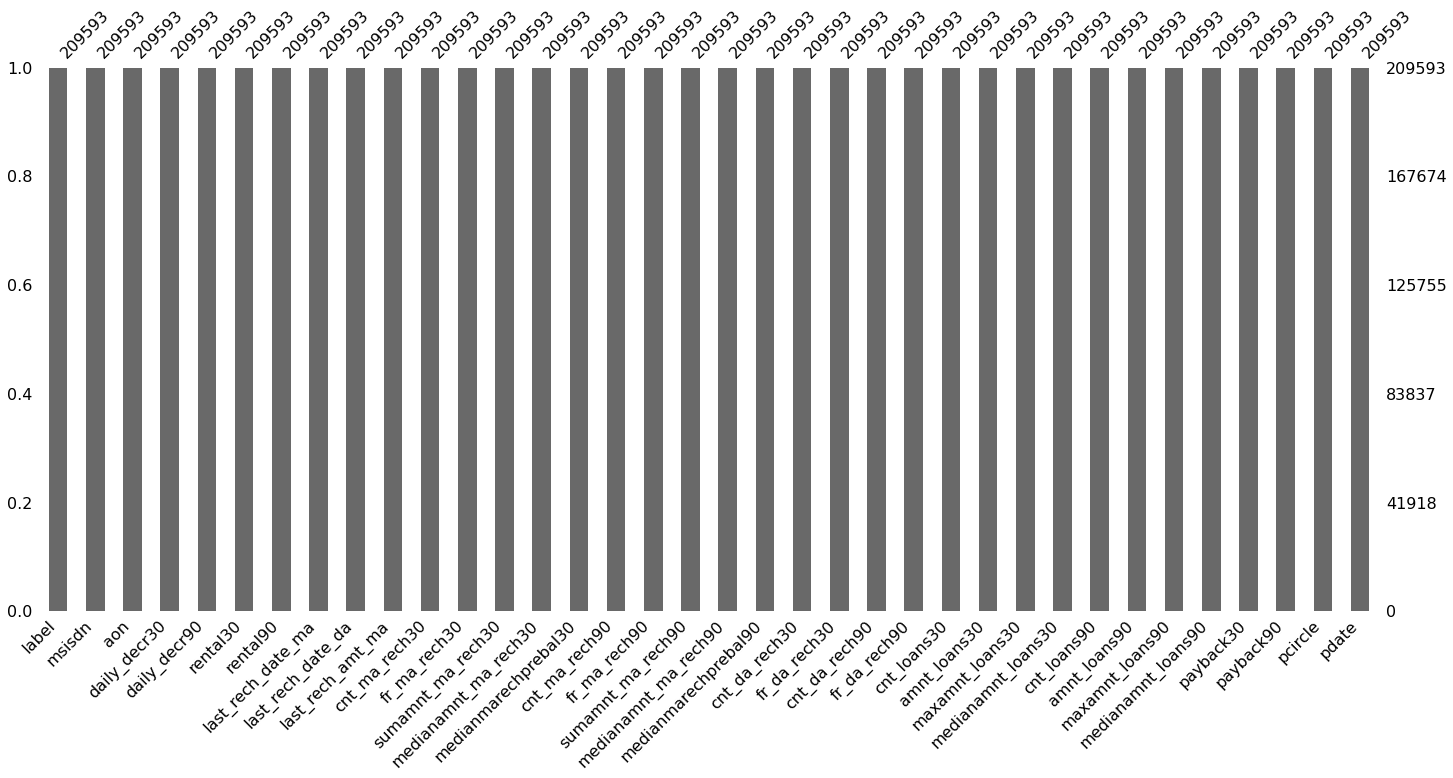

In [8]:
#Checking null values
import missingno as msno
msno.bar(df_mci)

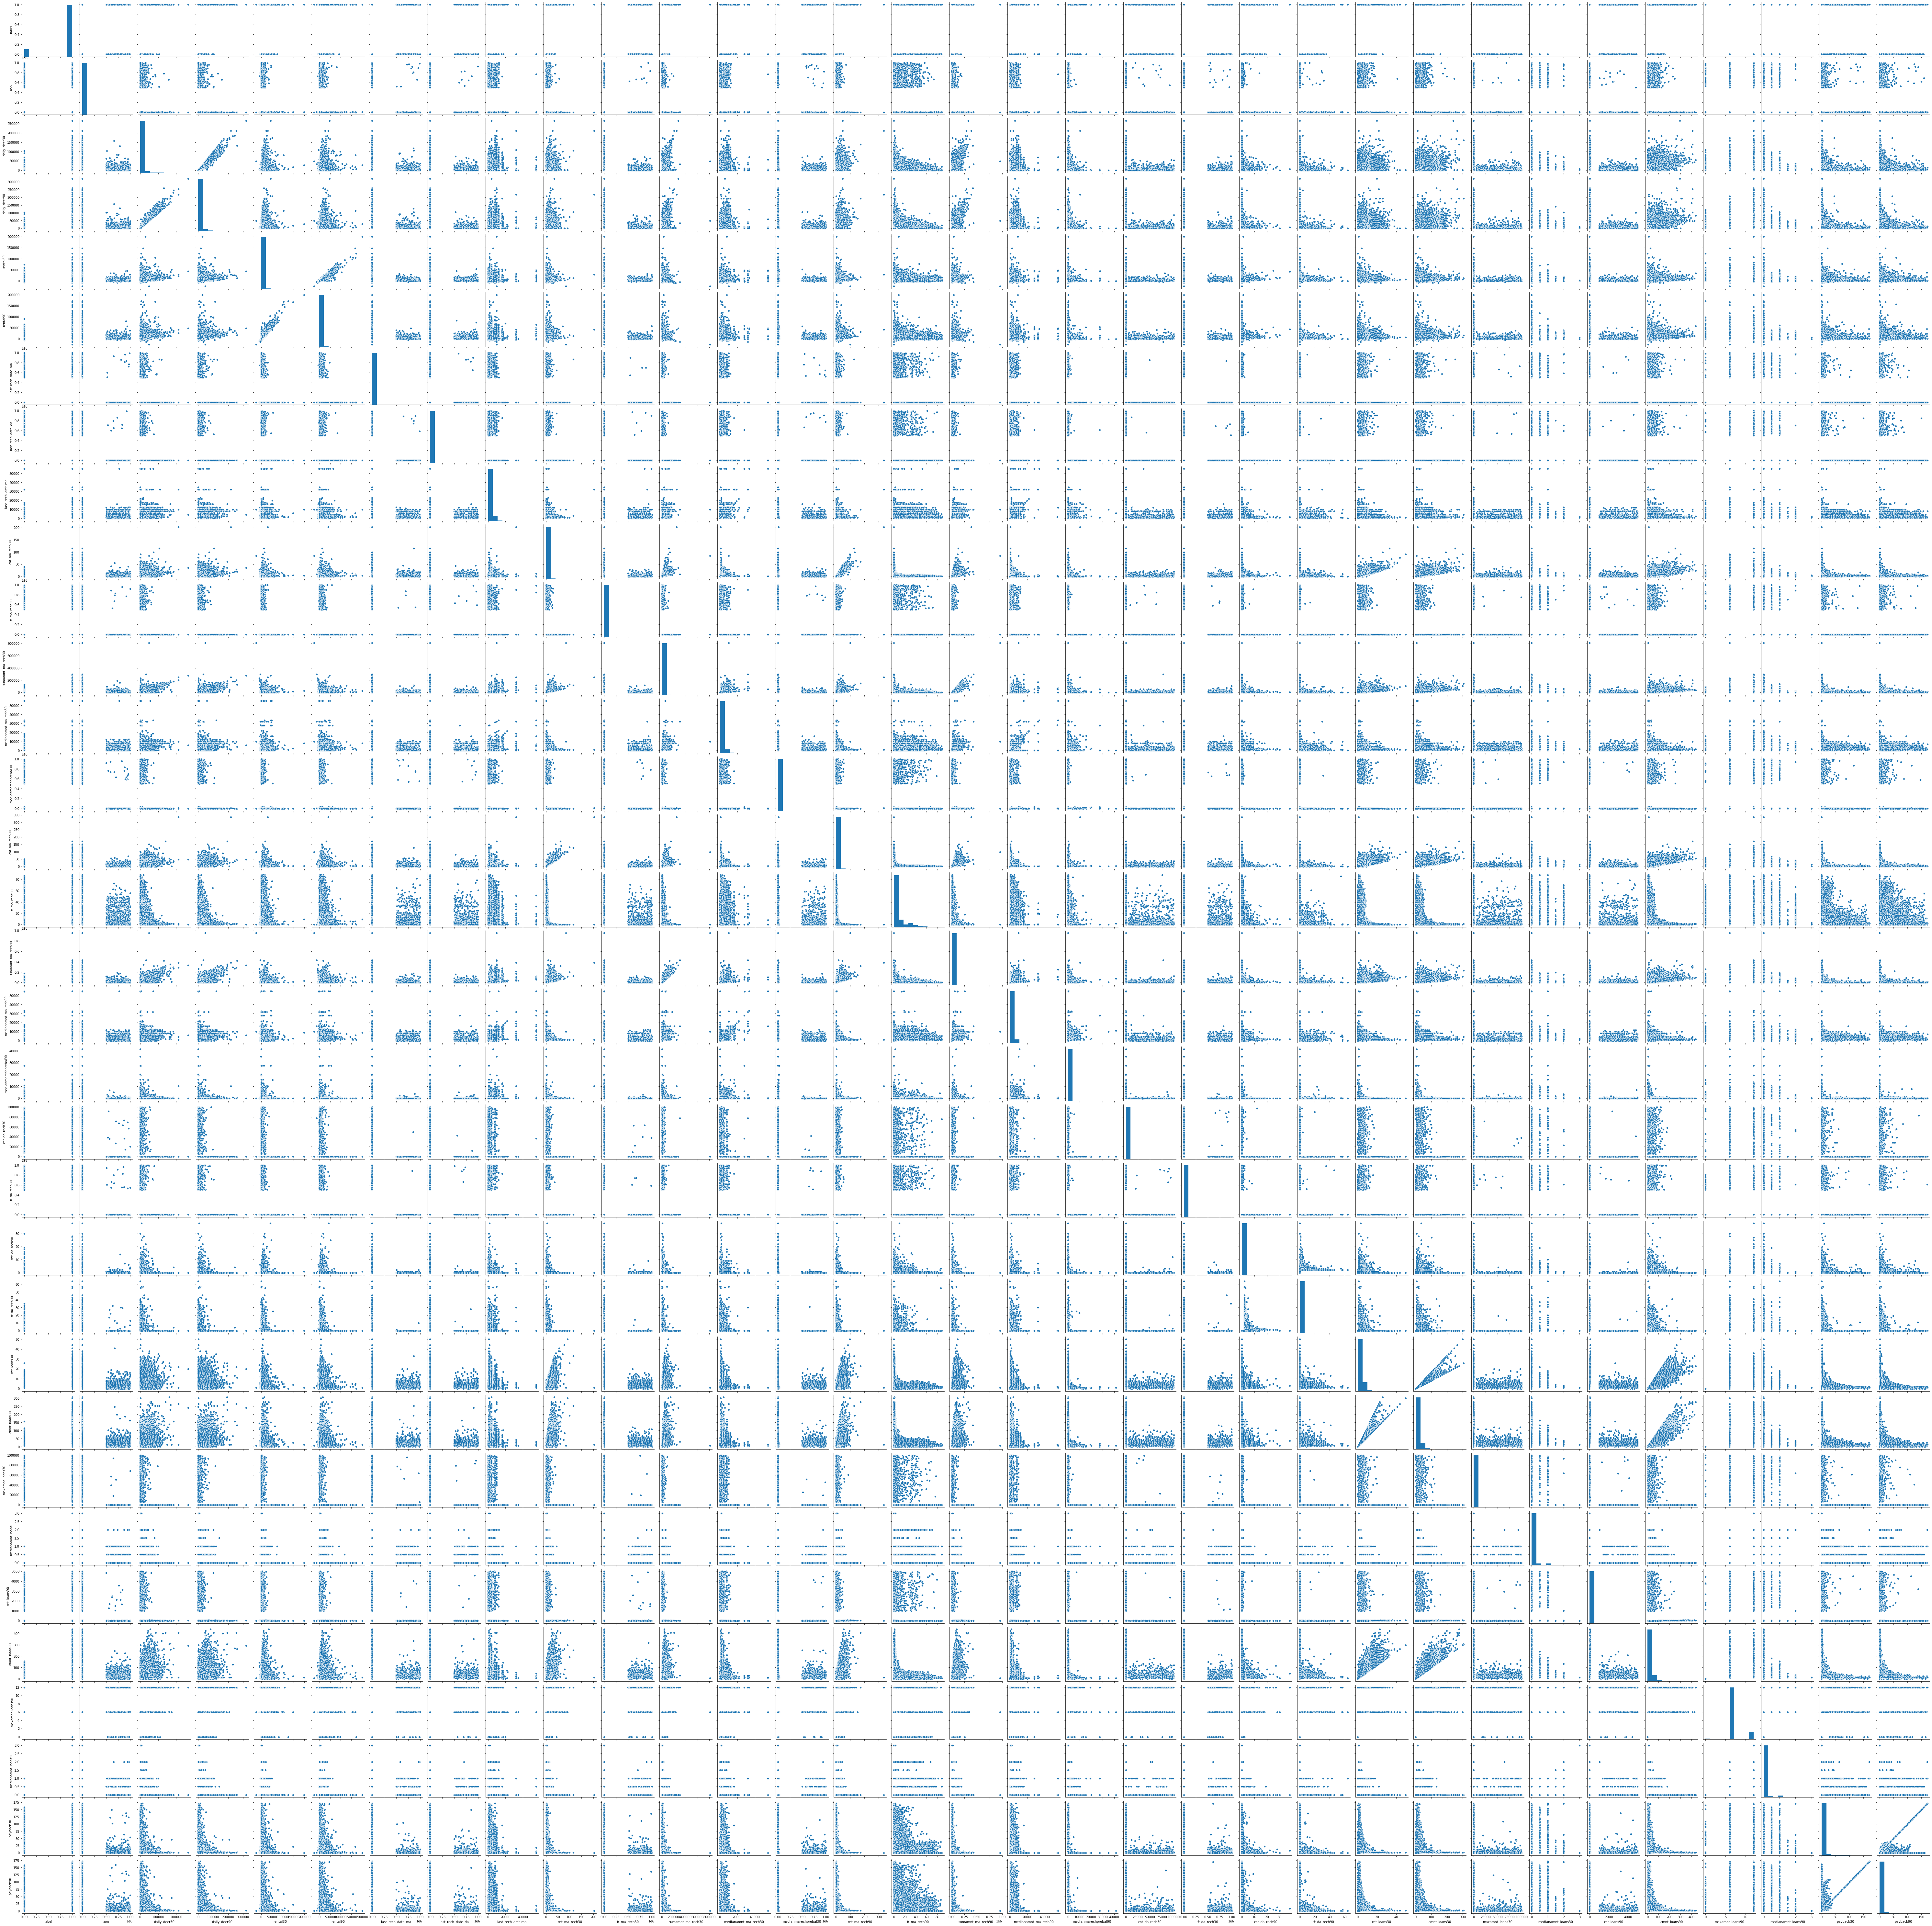

In [9]:
sns.pairplot(df_mci)

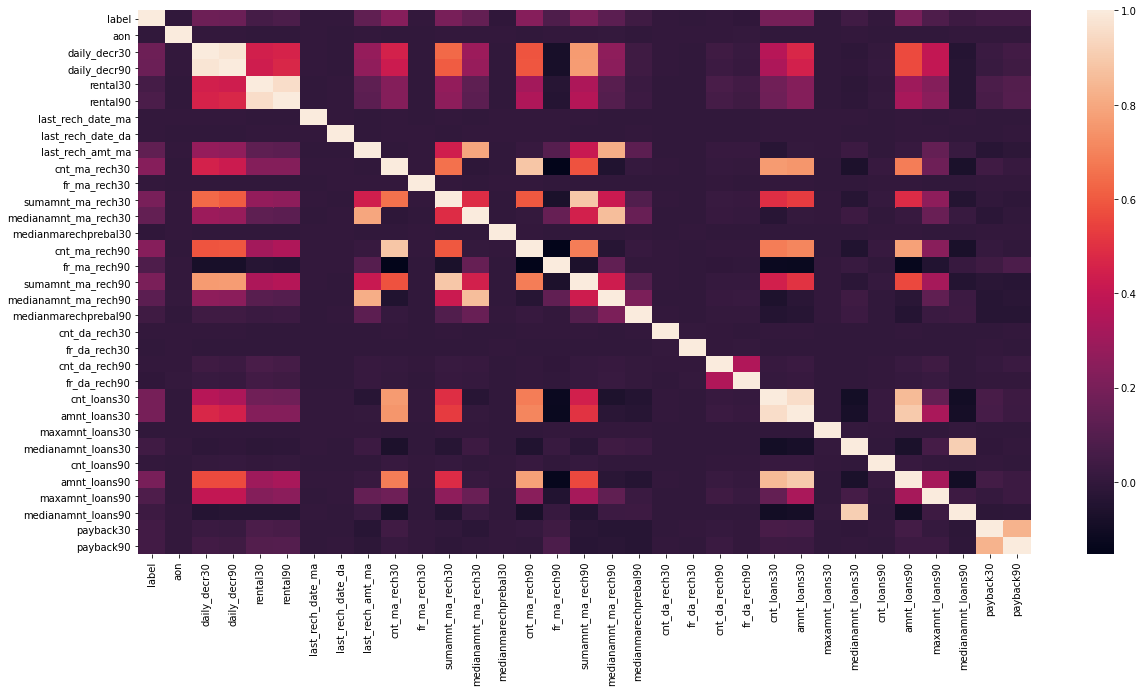

In [10]:
hmap_corr = df_mci.corr()
plt.figure(figsize=(20,10))
sns.heatmap(hmap_corr,annot=False)
plt.show()

In [11]:
hmap_corr

label       aon  daily_decr30  daily_decr90  \
label                 1.000000 -0.003785      0.168298      0.166150   
aon                  -0.003785  1.000000      0.001104      0.000374   
daily_decr30          0.168298  0.001104      1.000000      0.977704   
daily_decr90          0.166150  0.000374      0.977704      1.000000   
rental30              0.058085 -0.000960      0.442066      0.434685   
rental90              0.075521 -0.000790      0.458977      0.471730   
last_rech_date_ma     0.003728  0.001692      0.000487      0.000908   
last_rech_date_da     0.001711 -0.001693     -0.001636     -0.001886   
last_rech_amt_ma      0.131804  0.004256      0.275837      0.264131   
cnt_ma_rech30         0.237331 -0.003148      0.451385      0.426707   
fr_ma_rech30          0.001330 -0.001163     -0.000577     -0.000343   
sumamnt_ma_rech30     0.202828  0.000707      0.636536      0.603886   
medianamnt_ma_rech30  0.141490  0.004306      0.295356      0.282960   
medianmarechprebal30 -0.004829  0.003930     -0.001153     -0.000746   
cnt_ma_rech90         0.236392 -0.002725      0.587338      0.593069   
fr_ma_rech90          0.084385  0.004401     -0.078299     -0.079530   
sumamnt_ma_rech90     0.205793  0.001011      0.762981      0.768817   
medianamnt_ma_rech90  0.120855  0.004909      0.257847      0.250518   
medianmarechprebal90  0.039300 -0.000859      0.037495      0.036382   
cnt_da_rech30         0.003827  0.001564      0.000700      0.000661   
fr_da_rech30         -0.000027  0.000892     -0.001499     -0.001570   
cnt_da_rech90         0.002999  0.001121      0.038814      0.031155   
fr_da_rech90         -0.005418  0.005395      0.020673      0.016437   
cnt_loans30           0.196283 -0.001826      0.366116      0.340387   
amnt_loans30          0.197272 -0.001726      0.471492      0.447869   
maxamnt_loans30       0.000248 -0.002764     -0.000028      0.000025   
medianamnt_loans30    0.044589  0.004664     -0.011610     -0.005591   
cnt_loans90           0.004733 -0.000611      0.008962      0.009446   
amnt_loans90          0.199788 -0.002319      0.563496      0.567204   
maxamnt_loans90       0.084144 -0.001191      0.400199      0.397251   
medianamnt_loans90    0.035747  0.002771     -0.037305     -0.034686   
payback30             0.048336  0.001940      0.026915      0.019400   
payback90             0.049183  0.002203      0.047175      0.040800   

                      rental30  rental90  last_rech_date_ma  \
label                 0.058085  0.075521           0.003728   
aon                  -0.000960 -0.000790           0.001692   
daily_decr30          0.442066  0.458977           0.000487   
daily_decr90          0.434685  0.471730           0.000908   
rental30              1.000000  0.955237          -0.001095   
rental90              0.955237  1.000000          -0.001688   
last_rech_date_ma    -0.001095 -0.001688           1.000000   
last_rech_date_da     0.003261  0.002794           0.001790   
last_rech_amt_ma      0.127271  0.121416          -0.000147   
cnt_ma_rech30         0.233343  0.230260           0.004311   
fr_ma_rech30         -0.001219 -0.000503          -0.001629   
sumamnt_ma_rech30     0.272649  0.259709           0.002105   
medianamnt_ma_rech30  0.129853  0.120242          -0.001358   
medianmarechprebal30 -0.001415 -0.001237           0.004071   
cnt_ma_rech90         0.312118  0.345293           0.004263   
fr_ma_rech90         -0.033530 -0.036524           0.001414   
sumamnt_ma_rech90     0.342306  0.360601           0.002243   
medianamnt_ma_rech90  0.110356  0.103151          -0.000726   
medianmarechprebal90  0.027170  0.029547          -0.001086   
cnt_da_rech30        -0.001105 -0.000548          -0.003467   
fr_da_rech30         -0.002558 -0.002345          -0.003626   
cnt_da_rech90         0.072255  0.056282          -0.003538   
fr_da_rech90          0.046761  0.036886          -0.002395   
cnt_loans30           0.180203  0.171595           0.001193   
a

In [12]:
#removing unnecessary columns
df_mci.drop(columns=['msisdn','pcircle','pdate'],inplace=True)
df_mci

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0       29.000000  29.000000  
1        0.000000   0.000000  
2        0.000000   0.000000  
3        0.000000   0.000000  
4        2.333333   2.333333  
...           ...        ...  
209588   1.000000   1.000000  
209589   1.000000   1.000000  
209590   4.000000   3.833333  
209591   0

In [13]:
#Some data should not have decimal values so considering the average values were entered we will round off the data
columns = ['aon','last_rech_date_ma','last_rech_date_da','cnt_da_rech30','maxamnt_loans30','cnt_loans90','payback30']
for col in columns:
    df_mci.loc[:,col] = round(df_mci.loc[:,col])

In [14]:
#maxamnt_loans30 can only have 6,12 or 0 hence removing other invalid values
df_amnt = df_mci[~(df_mci['maxamnt_loans30'] > 12)]

In [15]:
print(df_amnt['maxamnt_loans30'].value_counts())
df_amnt

#Hence all unnecessary values have been removed from the dataset

6.0     179193
12.0     26109
0.0       3244
Name: maxamnt_loans30, dtype: int64


label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0            29.0  29.000000  
1             0.0   0.000000  
2             0.0   0.000000  
3             0.0   0.000000  
4             2.0   2.333333  
...           ...        ...  
209588        1.0   1.000000  
209589        1.0   1.000000  
209590        4.0   3.833333  
209591    

In [16]:
df_amnt.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 208546 entries, 0 to 209592
Data columns (total 33 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   label                 208546 non-null  int64  
 1   aon                   208546 non-null  float64
 2   daily_decr30          208546 non-null  float64
 3   daily_decr90          208546 non-null  float64
 4   rental30              208546 non-null  float64
 5   rental90              208546 non-null  float64
 6   last_rech_date_ma     208546 non-null  float64
 7   last_rech_date_da     208546 non-null  float64
 8   last_rech_amt_ma      208546 non-null  int64  
 9   cnt_ma_rech30         208546 non-null  int64  
 10  fr_ma_rech30          208546 non-null  float64
 11  sumamnt_ma_rech30     208546 non-null  float64
 12  medianamnt_ma_rech30  208546 non-null  float64
 13  medianmarechprebal30  208546 non-null  float64
 14  cnt_ma_rech90         208546 non-null  int64  
 15  

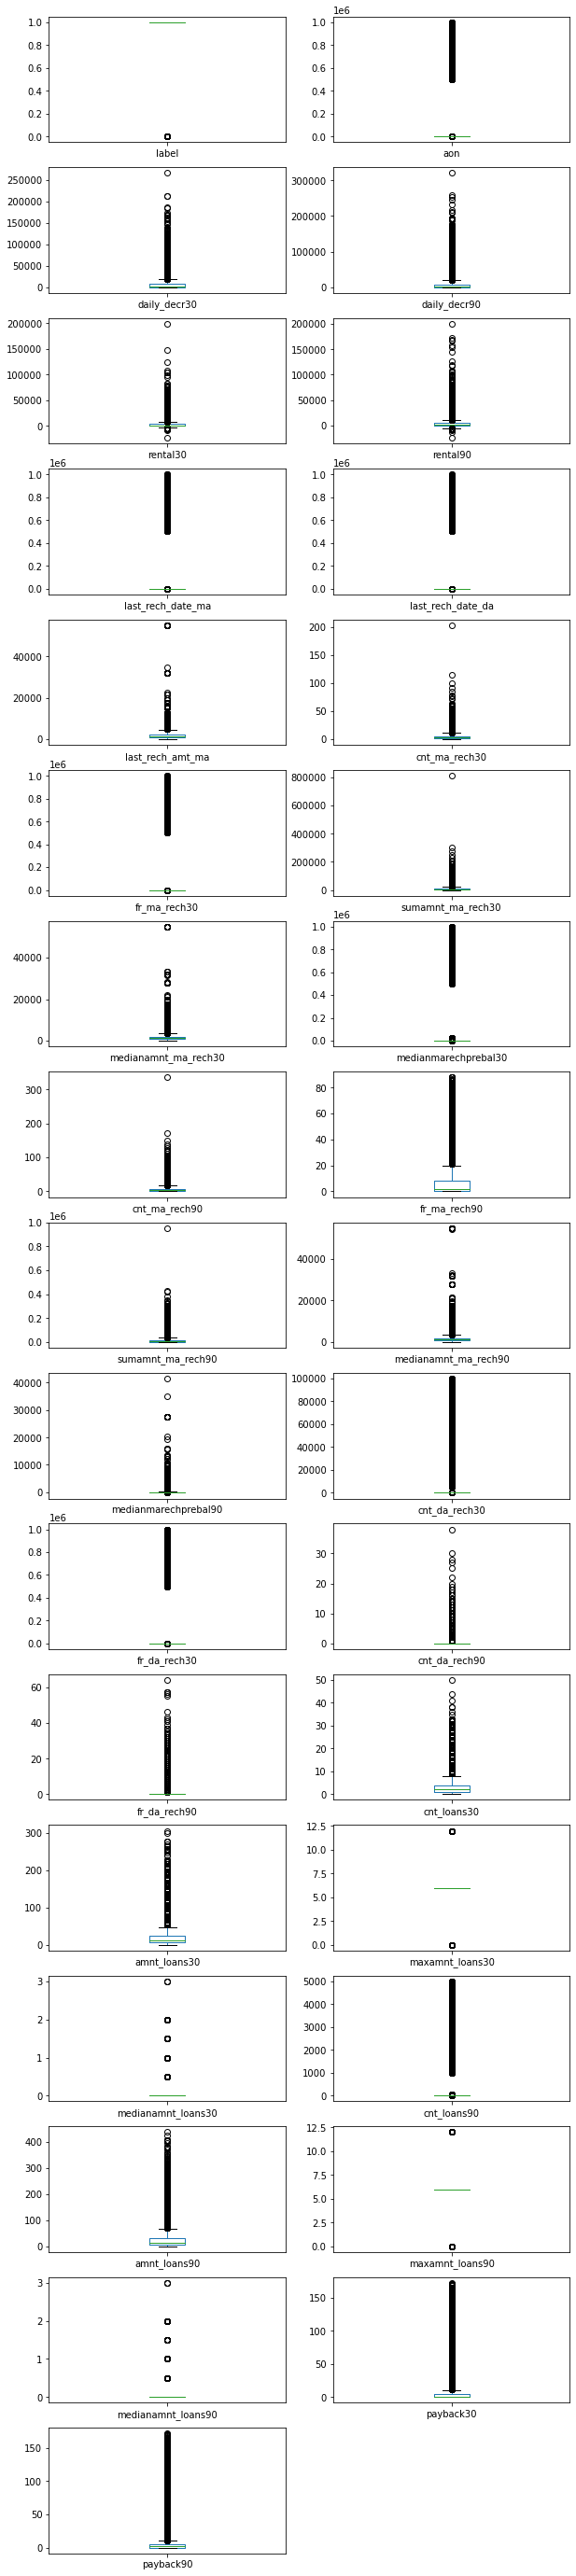

In [17]:
df_amnt.plot(kind='box',layout=(17,2),subplots=True,figsize=(10,50))
plt.show()

In [18]:
#Removing outliers 
from scipy.stats import zscore
z = np.abs(zscore(df_amnt))
z

array([[2.64779765, 0.10367899, 0.2523501 , ..., 0.22933259, 2.90096432,
        2.39253596],
       [0.37767236, 0.09787345, 0.73085637, ..., 0.22933259, 0.38571625,
        0.41913969],
       [0.37767236, 0.10020886, 0.43203813, ..., 0.22933259, 0.38571625,
        0.41913969],
       ...,
       [0.37767236, 0.09390194, 0.70061414, ..., 0.22933259, 0.067619  ,
        0.04748142],
       [0.37767236, 0.08441516, 0.77056963, ..., 0.22933259, 0.38571625,
        0.5988808 ],
       [0.37767236, 0.08640752, 0.09681546, ..., 0.22933259, 0.38571625,
        0.41913969]])

In [19]:
np.where(z>3)

(array([    21,     22,     22, ..., 208539, 208540, 208540], dtype=int64),
 array([15, 15, 32, ..., 28, 26, 30], dtype=int64))

In [20]:
df_new = df_amnt[(z<3).all(axis=1)]
df_new

label     aon  daily_decr30  daily_decr90  rental30  rental90  \
0           0   272.0   3055.050000   3065.150000    220.13    260.13   
1           1   712.0  12122.000000  12124.750000   3691.26   3691.26   
2           1   535.0   1398.000000   1398.000000    900.13    900.13   
3           1   241.0     21.228000     21.228000    159.42    159.42   
4           1   947.0    150.619333    150.619333   1098.90   1098.90   
...       ...     ...           ...           ...       ...       ...   
209588      1   404.0    151.872333    151.872333   1089.19   1089.19   
209589      1  1075.0     36.936000     36.936000   1728.36   1728.36   
209590      1  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591      1  1732.0  12488.228333  12574.370000    411.83    984.58   
209592      1  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        ...  cnt_loans30  amnt_loans30  maxamnt_loans30  medianamnt_loans30  \
0       ...            2            12              6.0                 0.0   
1       ...            1            12             12.0                 0.0   
2       ...            1             6              6.0                 0.0   
3       ...            2            12              6.0                 0.0   
4       ...            7            42              6.0                 0.0   
...     ...          ...           ...              ...                 ...   
209588  ...            2            12              6.0                 0.0   
209589  ...            3            18              6.0                 0.0   
209590  ...            4            42             12.0                 0.0   
209591  ...            2            18             12.0                 0.0   
209592  ...            2            18             12.0                 0.0   

        cnt_loans90  amnt_loans90  maxamnt_loans90  medianamnt_loans90  \
0               2.0            12                6                 0.0   
1               1.0            12               12                 0.0   
2               1.0             6                6                 0.0   
3               2.0            12                6                 0.0   
4               7.0            42                6                 0.0   
...             ...           ...              ...                 ...   
209588          2.0            12                6                 0.0   
209589          3.0            18                6                 0.0   
209590          6.0            54               12                 0.0   
209591          3.0            24               12                 0.0   
209592          2.0            18               12                 0.0   

        payback30  payback90  
0            29.0  29.000000  
1             0.0   0.000000  
2             0.0   0.000000  
3             0.0   0.000000  
4             2.0   2.333333  
...           ...        ...  
209588        1.0   1.000000  
209589        1.0   1.000000  
209590        4.0   3.833333  
209591    

In [21]:
#let's check skewness of the data
df_new.skew()

label                   -2.080819
aon                      0.958312
daily_decr30             1.970530
daily_decr90             2.088319
rental30                 2.201133
rental90                 2.252885
last_rech_date_ma        3.120059
last_rech_date_da       10.411784
last_rech_amt_ma         2.130236
cnt_ma_rech30            1.171362
fr_ma_rech30             2.007571
sumamnt_ma_rech30        1.632514
medianamnt_ma_rech30     2.331003
medianmarechprebal30    10.424679
cnt_ma_rech90            1.320474
fr_ma_rech90             1.988900
sumamnt_ma_rech90        1.709042
medianamnt_ma_rech90     2.377264
medianmarechprebal90     3.693974
cnt_da_rech30           51.004425
fr_da_rech30             0.000000
cnt_da_rech90            6.941936
fr_da_rech90             0.000000
cnt_loans30              1.473518
amnt_loans30             1.448696
maxamnt_loans30          2.694056
medianamnt_loans30       5.339476
cnt_loans90              1.703632
amnt_loans90             1.689725
maxamnt_loans9

In [22]:
#DATA VISUALIZATION

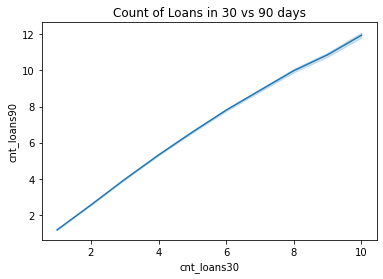

In [23]:
sns.lineplot(df_new.cnt_loans30,df_new.cnt_loans90)
plt.title('Count of Loans in 30 vs 90 days')
plt.show()

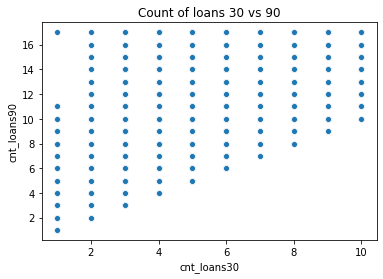

In [24]:
sns.scatterplot(x = 'cnt_loans30',y = 'cnt_loans90',data = df_new)
plt.title('Count of loans 30 vs 90')
plt.show()

In [25]:
d30 = df_new.cnt_loans30.mean()
d90 = df_new.cnt_loans90.mean()
print('\nMean of 30 days : {}\nMean of 90 days : {}'.format(d30,d90))
#The average amount loans taken by users is decreasing

rec30 = df_new.cnt_loans30.sum()/30
rec90 = df_new.cnt_loans90.sum()/90
print('\nDaily average number loans in 30 days: {}\nDaily average number loans in 90 days : {}'.format(rec30,rec90))
#Daily average of number of loans is increasing 


Mean of 30 days : 2.5321559438641974
Mean of 90 days : 3.2352057731136425

Daily average number loans in 30 days: 13544.333333333334
Daily average number loans in 90 days : 5768.3


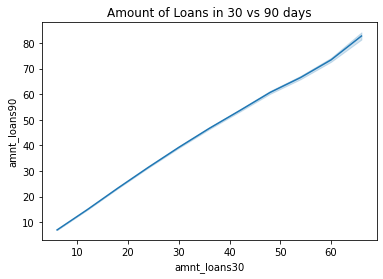

In [26]:
#amnt_loans30 abd amnt_loans90
sns.lineplot(df_new.amnt_loans30,df_new.amnt_loans90)
plt.title('Amount of Loans in 30 vs 90 days')
plt.show()

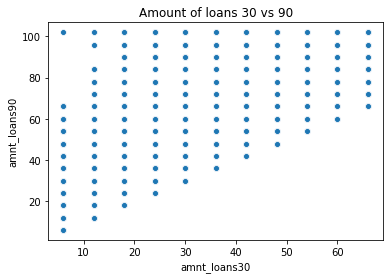

In [27]:
sns.scatterplot(x = 'amnt_loans30',y = 'amnt_loans90',data = df_new)
plt.title('Amount of loans 30 vs 90')
plt.show()

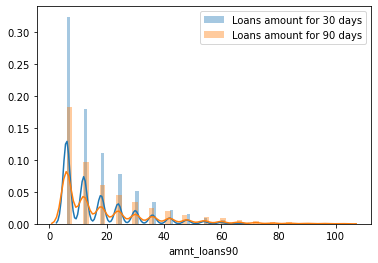

In [28]:
sns.distplot(df_new.amnt_loans30)
sns.distplot(df_new.amnt_loans90)
plt.legend(['Loans amount for 30 days','Loans amount for 90 days'])
plt.show()

In [29]:
#Statstical Analysis
l30 = df_new.amnt_loans30.mean()
l90 = df_new.amnt_loans90.mean()
print('\nAverage amount of loans in 30 days : {}\nAverage amount of loans in 90 days : {}'.format(l30,l90))


loan_daily30 = df_new.amnt_loans30.sum()/30
loan_daily90 = df_new.amnt_loans90.sum()/90
print('\nDaily average amount spent on loans in 30 days: {}\nDaily average amount spent on loans in 90 days : {}'.format(loan_daily30,loan_daily90))



Average amount of loans in 30 days : 16.047573347957226
Average amount of loans in 90 days : 20.29769175162649

Daily average amount spent on loans in 30 days: 85837.4
Daily average amount spent on loans in 90 days : 36190.333333333336


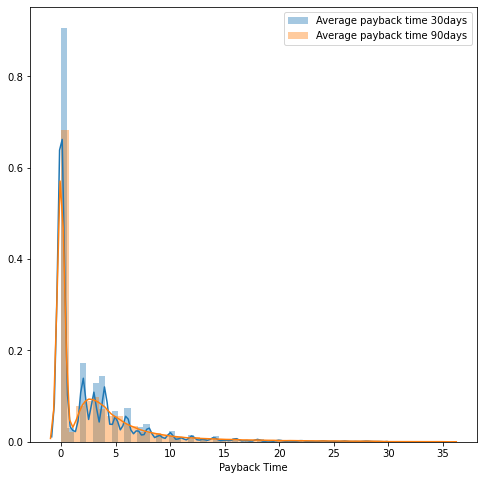

In [64]:
#payback30 and payback90
plt.figure(figsize=(8,8))
sns.distplot(df_new.payback30)
sns.distplot(df_new.payback90)
plt.legend(['Average payback time 30days','Average payback time 90days'])
plt.xlabel('Payback Time')
plt.show()

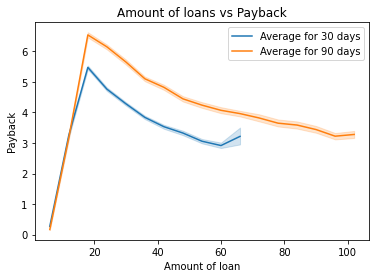

In [42]:
#payback vs loan amount
sns.lineplot(df_new.amnt_loans30,df_new.payback30)
sns.lineplot(df_new.amnt_loans90,df_new.payback90)
plt.title('Amount of loans vs Payback Time')
plt.legend(['Average for 30 days','Average for 90 days'])
plt.xlabel('Amount of loan')
plt.ylabel('Payback Time')
plt.show()

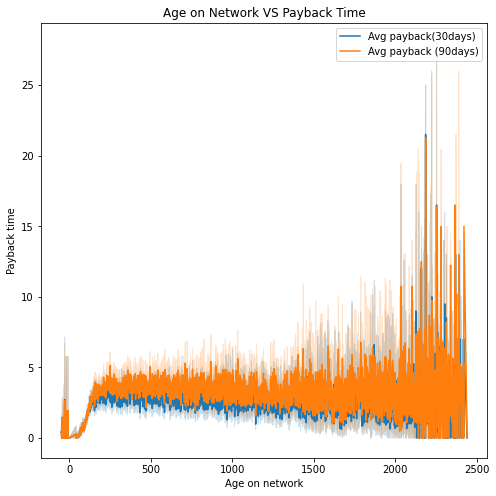

In [47]:
#Payback vs age on network
plt.figure(figsize=(8,8))
sns.lineplot(df_new.aon,df_new.payback30)
sns.lineplot(df_new.aon,df_new.payback90)
plt.title('Age on Network VS Payback Time')
plt.xlabel('Age on network')
plt.ylabel('Payback time')
plt.legend(['Avg payback(30days)','Avg payback (90days)'])
plt.show()

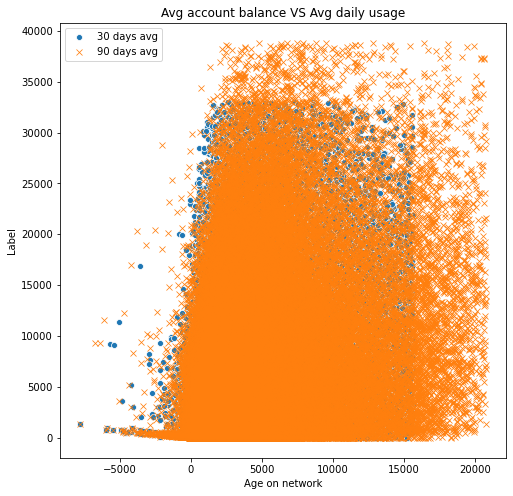

In [50]:
#aon
plt.figure(figsize=(8,8))
sns.scatterplot(df_new.rental30,df_new.daily_decr30)
sns.scatterplot(df_new.rental90,df_new.daily_decr90,marker='x')
plt.title('Avg account balance VS Avg daily usage')
plt.xlabel('Avg account balance')
plt.ylabel('Avg daily usage')
plt.legend(['30 days avg','90 days avg'])
plt.show()

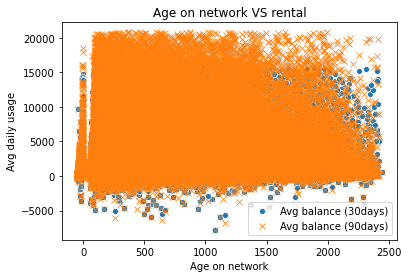

In [51]:
#avg balance & avg  usage
sns.scatterplot(df_new.aon,df_new.rental30)
sns.scatterplot(df_new.aon,df_new.rental90,marker='x')
plt.title('Age on network VS rental')
plt.xlabel('Age on network')
plt.ylabel('Avg daily usage')
plt.legend(['Avg balance (30days)','Avg balance (90days)'])
plt.show()

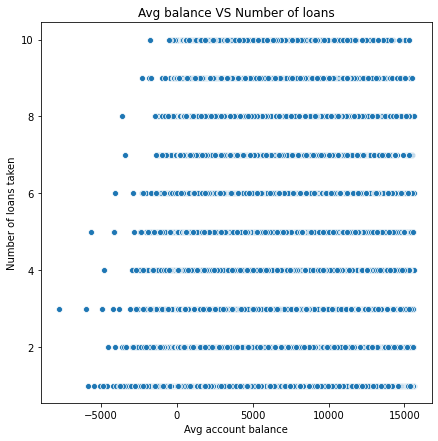

In [55]:
plt.figure(figsize=(7,7))
sns.scatterplot(df_new.rental30,df_new.cnt_loans30)
plt.title('Avg balance VS Number of loans')
plt.xlabel('Avg account balance')
plt.ylabel('Number of loans taken')
plt.show()

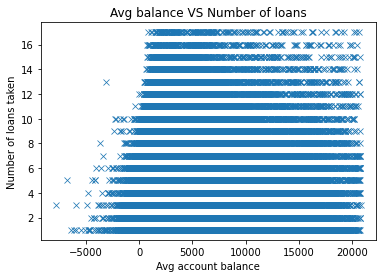

In [57]:
sns.scatterplot(df_new.rental90,df_new.cnt_loans90,marker='x')
plt.title('Avg balance VS Number of loans')
plt.xlabel('Avg account balance')
plt.ylabel('Number of loans taken')
plt.show()

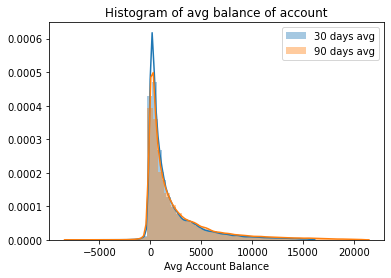

In [58]:
sns.distplot(df_new.rental30)
sns.distplot(df_new.rental90)
plt.title('Histogram of avg balance of account')
plt.xlabel('Avg Account Balance')
plt.legend(['30 days avg','90 days avg'])
plt.show()

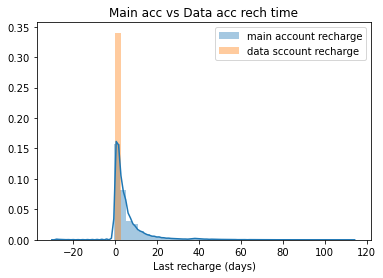

In [59]:
sns.distplot(df_new.last_rech_date_ma)
sns.distplot(df_new.last_rech_date_da)
plt.title('Main acc vs Data acc rech time')
plt.xlabel('Last recharge (days)')
plt.legend(['main account recharge','data sccount recharge'])
plt.show()

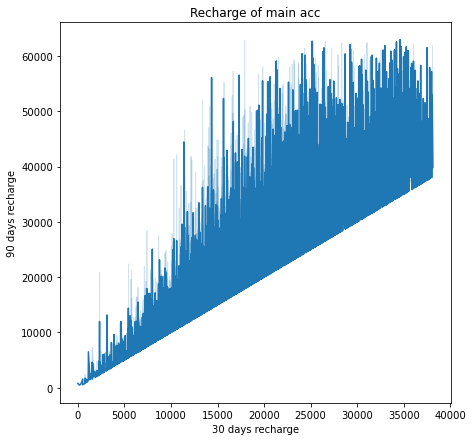

In [65]:
plt.figure(figsize=(7,7))
sns.lineplot(df_new.sumamnt_ma_rech30,df_new.sumamnt_ma_rech90)
plt.title('Recharge of main acc')
plt.xlabel('30 days recharge')
plt.ylabel('90 days recharge')
plt.show()

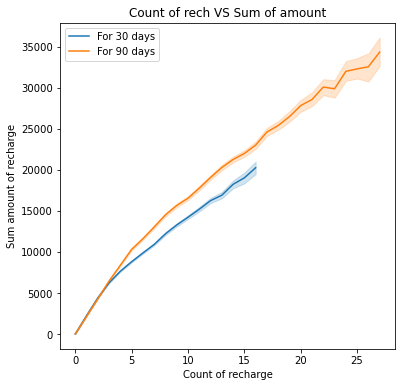

In [66]:
plt.figure(figsize=(6,6))
sns.lineplot(df_new.cnt_ma_rech30,df_new.sumamnt_ma_rech30)
sns.lineplot(df_new.cnt_ma_rech90,df_new.sumamnt_ma_rech90)
plt.title('Count of rech VS Sum of amount')
plt.legend(['For 30 days','For 90 days'])
plt.xlabel('Count of recharge')
plt.ylabel('Sum amount of recharge')
plt.show()

In [30]:
#Let's separate the target column from the dataset and then use power transformer to remove the skewness
x = df_new.iloc[:,1:]
x

aon  daily_decr30  daily_decr90  rental30  rental90  \
0        272.0   3055.050000   3065.150000    220.13    260.13   
1        712.0  12122.000000  12124.750000   3691.26   3691.26   
2        535.0   1398.000000   1398.000000    900.13    900.13   
3        241.0     21.228000     21.228000    159.42    159.42   
4        947.0    150.619333    150.619333   1098.90   1098.90   
...        ...           ...           ...       ...       ...   
209588   404.0    151.872333    151.872333   1089.19   1089.19   
209589  1075.0     36.936000     36.936000   1728.36   1728.36   
209590  1013.0  11843.111667  11904.350000   5861.83   8893.20   
209591  1732.0  12488.228333  12574.370000    411.83    984.58   
209592  1581.0   4489.362000   4534.820000    483.92    631.20   

        last_rech_date_ma  last_rech_date_da  last_rech_amt_ma  cnt_ma_rech30  \
0                     2.0                0.0              1539              2   
1                    20.0                0.0              5787              1   
2                     3.0                0.0              1539              1   
3                    41.0                0.0               947              0   
4                     4.0                0.0              2309              7   
...                   ...                ...               ...            ...   
209588                1.0                0.0              4048              3   
209589                4.0                0.0               773              4   
209590                3.0                0.0              1539              5   
209591                2.0               38.0               773              5   
209592               13.0                0.0              7526              2   

        fr_ma_rech30  ...  cnt_loans30  amnt_loans30  maxamnt_loans30  \
0               21.0  ...            2            12              6.0   
1                0.0  ...            1            12             12.0   
2                0.0  ...            1             6              6.0   
3                0.0  ...            2            12              6.0   
4                2.0  ...            7            42              6.0   
...              ...  ...          ...           ...              ...   
209588           2.0  ...            2            12              6.0   
209589           1.0  ...            3            18              6.0   
209590           8.0  ...            4            42             12.0   
209591           4.0  ...            2            18             12.0   
209592           1.0  ...            2            18             12.0   

        medianamnt_loans30  cnt_loans90  amnt_loans90  maxamnt_loans90  \
0                      0.0          2.0            12                6   
1                      0.0          1.0            12               12   
2                      0.0          1.0             6                6   
3                      0.0          2.0            12                6   
4                      0.0          7.0            42                6   
...                    ...          ...           ...              ...   
209588                 0.0          2.0            12                6   
209589                 0.0          3.0            18                6   
209590                 0.0          6.0            54               12   
209591                 0.0          3.0            24               12   
209592                 0.0          2.0            18               12   

        medianamnt_loans90  payback30  payback90  
0                      0.0       29.0  29.000000  
1                      0.0        0.0   0.000000  
2                      0.0        0.0   0.000000  
3                      0.0        0.0   0.000000  
4                      0.0        2.0   2.333333  
...                    ...        ...        ...  
209588                 0.0        1.0   1.000000  
209589                 0.0        1.0   1.000000  
209590              

In [31]:
y = df_new.loc[:,'label']
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 160468, dtype: int64

In [32]:
from sklearn.preprocessing import PowerTransformer
pt = PowerTransformer()
for col in x.columns:
    if x.loc[:,col].skew() > 0.55 or x.loc[:,col].skew()< -0.55:
        x.loc[:,col] = pt.fit_transform(x.loc[:,col].to_frame())

In [33]:
x.skew()

aon                      0.311588
daily_decr30            -2.022649
daily_decr90            -2.153405
rental30                 0.203584
rental90                 0.224917
last_rech_date_ma        0.135984
last_rech_date_da      -59.116979
last_rech_amt_ma        -0.187800
cnt_ma_rech30           -0.026963
fr_ma_rech30             0.137170
sumamnt_ma_rech30       -0.458578
medianamnt_ma_rech30    -0.314415
medianmarechprebal30     1.985871
cnt_ma_rech90           -0.029868
fr_ma_rech90             0.144545
sumamnt_ma_rech90       -0.366194
medianamnt_ma_rech90    -0.178269
medianmarechprebal90     0.992400
cnt_da_rech30            9.767206
fr_da_rech30             0.000000
cnt_da_rech90            6.941936
fr_da_rech90             0.000000
cnt_loans30              0.208907
amnt_loans30             0.137201
maxamnt_loans30          2.694056
medianamnt_loans30       5.339476
cnt_loans90              0.188889
amnt_loans90             0.122590
maxamnt_loans90          2.673262
medianamnt_loa

In [34]:
#Let's scale the data before choosing the model for prediction 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
for col in x.columns:
    x.loc[:,col] = sc.fit_transform(x.loc[:,col].to_frame())

In [35]:
y

0         0
1         1
2         1
3         1
4         1
         ..
209588    1
209589    1
209590    1
209591    1
209592    1
Name: label, Length: 160468, dtype: int64

In [69]:
#Let's test the prediction model
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier

In [31]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=42)

In [32]:
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
for m in models:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
    con_mat = confusion_matrix(y_test,pred)
    print("\n\nFor model {} accuracy score : {}\nConfusion matrix : \n{}".format(m,acc_score,con_mat))
    print('Classification Report :\n',classification_report(y_test,pred))



For model LogisticRegression() accuracy score : 0.8735698083106912
Confusion matrix : 
[[ 1341  4277]
 [  795 33704]]
Classification Report :
               precision    recall  f1-score   support

           0       0.63      0.24      0.35      5618
           1       0.89      0.98      0.93     34499

    accuracy                           0.87     40117
   macro avg       0.76      0.61      0.64     40117
weighted avg       0.85      0.87      0.85     40117



For model DecisionTreeClassifier() accuracy score : 0.8570680758780567
Confusion matrix : 
[[ 2940  2678]
 [ 3056 31443]]
Classification Report :
               precision    recall  f1-score   support

           0       0.49      0.52      0.51      5618
           1       0.92      0.91      0.92     34499

    accuracy                           0.86     40117
   macro avg       0.71      0.72      0.71     40117
weighted avg       0.86      0.86      0.86     40117



For model KNeighborsClassifier() accuracy score : 

In [33]:
#Let's test cross validation score for the above models
from sklearn.model_selection import StratifiedKFold
models = [LogisticRegression(),DecisionTreeClassifier(),KNeighborsClassifier()]
cv = StratifiedKFold(n_splits=5)
for m in models:
    cvs = cross_val_score(m,x,y,cv=cv,scoring='accuracy').mean()
    print("Accuracy for model {} is {}".format(m,cvs))

Accuracy for model LogisticRegression() is 0.8738751797922862
Accuracy for model DecisionTreeClassifier() is 0.857697511425765
Accuracy for model KNeighborsClassifier() is 0.892059478026885


In [34]:
#Boosting score using ensembling techniques
emodels = [RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier()]
cv = StratifiedKFold()
for m in emodels:
    m.fit(x_train,y_train)
    pred = m.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
    con_mat = confusion_matrix(y_test,pred)
    print("\n\nFor model {} accuracy score : {}\nConfusion matrix : \n{}".format(m,acc_score,con_mat))
    print('Classification Report :\n',classification_report(y_test,pred))



For model RandomForestClassifier() accuracy score : 0.9065483460876935
Confusion matrix : 
[[ 2709  2909]
 [  840 33659]]
Classification Report :
               precision    recall  f1-score   support

           0       0.76      0.48      0.59      5618
           1       0.92      0.98      0.95     34499

    accuracy                           0.91     40117
   macro avg       0.84      0.73      0.77     40117
weighted avg       0.90      0.91      0.90     40117



For model GradientBoostingClassifier() accuracy score : 0.9014632200812623
Confusion matrix : 
[[ 2211  3407]
 [  546 33953]]
Classification Report :
               precision    recall  f1-score   support

           0       0.80      0.39      0.53      5618
           1       0.91      0.98      0.94     34499

    accuracy                           0.90     40117
   macro avg       0.86      0.69      0.74     40117
weighted avg       0.89      0.90      0.89     40117



For model AdaBoostClassifier() accuracy sc

In [35]:
#Checking cross validation score
emodels = [RandomForestClassifier(),GradientBoostingClassifier(),AdaBoostClassifier(),XGBClassifier()]
cv = StratifiedKFold(n_splits=5,shuffle=False)
for m in emodels:
    cvs = cross_val_score(m,x,y,cv=cv,scoring='accuracy').mean()
    print("For model {} accuracy is : {}".format(m,cvs))

For model RandomForestClassifier() accuracy is : 0.9064922673018214
For model GradientBoostingClassifier() accuracy is : 0.9024727634439971
For model AdaBoostClassifier() accuracy is : 0.8964092512022768
For model XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None) accuracy is : 0.9091781557427712


In [36]:
#Let's find the best parameter possible for the best scoring models
def best_parameter(model,params):
    from sklearn.model_selection import GridSearchCV
    from sklearn.model_selection import StratifiedKFold
    cv = StratifiedKFold(n_splits=5,shuffle=False)
    grd = GridSearchCV(model,params,cv=cv)
    grd.fit(x,y)
    score = grd.best_score_
    parameter = grd.best_params_
    return print("Model will give accuracy {} for parameters {}\n".format(score,parameter))

In [37]:
#Random Forest Classifier
rfc = RandomForestClassifier()
params = {
    'n_estimators':[10,30,50,70,100],
    'max_depth':[3,6,9],
    'criterion':('gini','entropy')
}

best_parameter(rfc,params)

Model will give accuracy 0.9006904837005154 for parameters {'criterion': 'gini', 'max_depth': 9, 'n_estimators': 10}



In [71]:
#Best Accuracy id given by  hence finalising the model
#Finding best random state 
clf = RandomForestClassifier(criterion='gini',max_depth=9,n_estimators=10)
best_random = 0
acc = 0
for r in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=r)
    clf.fit(x_train,y_train)
    pred = clf.predict(x_test)
    acc_score = accuracy_score(y_test,pred)
    if r>best_random:
        best_random = r
        acc= acc_score
        
print("Random state {} gives best accuracy {}".format(best_random,acc))

Random state 99 gives best accuracy 0.9051275020564847


In [72]:
import joblib
joblib.dump(clf,'Project_MCI.obj')

['Project_MCI.obj']